# New Machine Learning Note Book

# Regression


In [41]:
import numpy as np 
import matplotlib.pyplot as plt

from sklearn import datasets,linear_model,model_selection

In [42]:
X,y= datasets.load_diabetes(return_X_y=True)

print('X',X.shape)
print('X_0',X[12])

X (442, 10)
X_0 [ 0.01628068 -0.04464164 -0.02884001 -0.00911327 -0.00432087 -0.00976889
  0.04495846 -0.03949338 -0.03074792 -0.04249877]


In [43]:
X=X[0:,0]
X=X.reshape((-1,1))
print('X',X.shape)

X (442, 1)


In [44]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.33)

In [45]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (296, 1)
X_test (146, 1)
y_train (296,)
y_test (146,)


In [46]:
model=linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [47]:
y_pred=model.predict(X_test)
print('y_pred',y_pred)

y_pred [169.15547508 170.43412743 174.27008449 138.4678186  151.25434213
 176.8273892  142.30377566 146.13973272 169.15547508 152.53299449
 161.48356096 116.7307286  155.09029919 133.35320919 119.28803331
 139.74647096 151.25434213 180.66334626 130.79590448 137.18916625
 125.68129507 152.53299449 151.25434213 139.74647096 185.77795567
 171.71277978 178.10604155 148.69703743 161.48356096 119.28803331
 116.7307286  133.35320919 142.30377566 161.48356096 151.25434213
 137.18916625 175.54873684 160.20490861 167.87682272 124.40264272
 167.87682272 190.89256508 169.15547508 160.20490861 143.58242802
 161.48356096 133.35320919 169.15547508 144.86108037 124.40264272
 148.69703743 148.69703743 143.58242802 156.36895155 160.20490861
 155.09029919 130.79590448 175.54873684 144.86108037 143.58242802
 157.6476039  144.86108037 158.92625625 164.04086567 151.25434213
 155.09029919 144.86108037 128.23859978 171.71277978 135.9105139
 148.69703743 135.9105139  146.13973272 155.09029919 149.97568978
 178

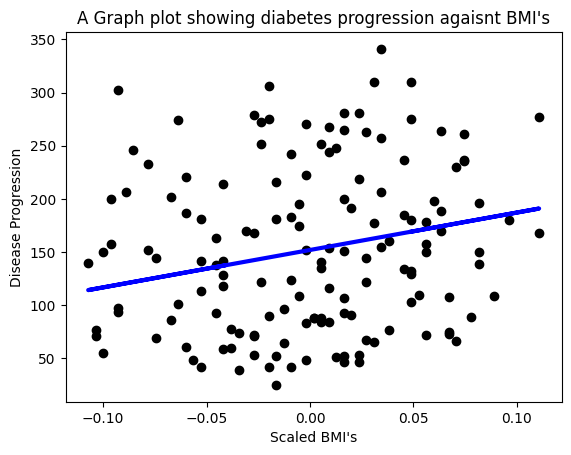

In [48]:
plt.scatter(X_test,y_test,color='black')
plt.plot(X_test,y_pred,color='blue',linewidth=3)
plt.xlabel("Scaled BMI's")
plt.ylabel('Disease Progression')
plt.title("A Graph plot showing diabetes progression agaisnt BMI's")
plt.show()

## Data

In [49]:
import pandas as pd

In [50]:
pumpkins=pd.read_csv('US-pumpkins.csv')
pumpkins.head()
# pumpkins[-5:]

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [51]:
pumpkins.isnull().sum()
pumpkins=pumpkins[pumpkins['Package'].str.contains('bushel',case=True,regex=True)]

In [52]:
columns_to_select=['Package','Low Price','High Price','Date']
pumpkins=pumpkins.loc[:,columns_to_select]
pumpkins.loc[:,['Low Price','High Price']].describe()

,Low Price,High Price
count,415.000000,415.000000
mean,18.007831,18.989759
std,5.273335,5.694920
min,10.750000,12.000000
25%,15.000000,17.000000
50%,17.000000,18.000000
75%,18.000000,19.000000
max,48.000000,55.000000


In [53]:
price=(pumpkins['Low Price']+pumpkins['High Price'])/2
month= pd.DatetimeIndex(pumpkins['Date']).month
print(month)

Index([ 9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
       ...
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
      dtype='int32', name='Date', length=415)


In [54]:
new_pumpkins=pd.DataFrame({'Month':month,'Package':pumpkins['Package'],'Low Price':pumpkins['Low Price'],'High Price':pumpkins['High Price'],'Average Price':price})

In [55]:
new_pumpkins

,Month,Package,Low Price,High Price,Average Price
70,9,1 1/9 bushel cartons,15.00,15.0,15.000
71,9,1 1/9 bushel cartons,18.00,18.0,18.000
72,10,1 1/9 bushel cartons,18.00,18.0,18.000
73,10,1 1/9 bushel cartons,17.00,17.0,17.000
74,10,1 1/9 bushel cartons,15.00,15.0,15.000
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.00,15.0,15.000
1739,9,1/2 bushel cartons,13.75,15.0,14.375
1740,9,1/2 bushel cartons,10.75,15.0,12.875
1741,9,1/2 bushel cartons,12.00,12.0,12.000


In [56]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Average Price'] = price/(1+1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Average Price'] = price/(1/2)

In [57]:
new_pumpkins

,Month,Package,Low Price,High Price,Average Price
70,9,1 1/9 bushel cartons,15.00,15.0,13.50
71,9,1 1/9 bushel cartons,18.00,18.0,16.20
72,10,1 1/9 bushel cartons,18.00,18.0,16.20
73,10,1 1/9 bushel cartons,17.00,17.0,15.30
74,10,1 1/9 bushel cartons,15.00,15.0,13.50
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.00,15.0,30.00
1739,9,1/2 bushel cartons,13.75,15.0,28.75
1740,9,1/2 bushel cartons,10.75,15.0,25.75
1741,9,1/2 bushel cartons,12.00,12.0,24.00


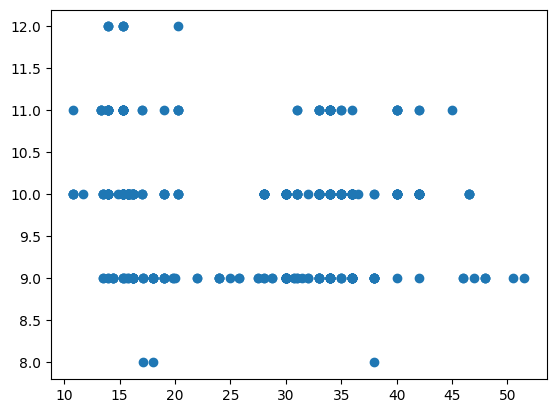

In [58]:
price=new_pumpkins['Average Price']
month=new_pumpkins['Month']
plt.scatter(price,month)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '8'),
  Text(1, 0, '9'),
  Text(2, 0, '10'),
  Text(3, 0, '11'),
  Text(4, 0, '12')])

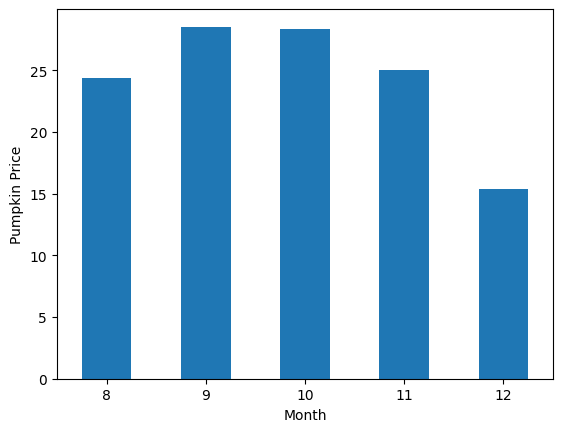

In [59]:
new_pumpkins.groupby(['Month'])['Average Price'].mean().plot(kind='bar')
plt.ylabel('Pumpkin Price')
plt.xticks(rotation=0)

## Linear

### Example Notebook

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('US-pumpkins.csv')

pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [61]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

columns_to_select = ['Package', 'Variety', 'City Name', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()

C:\Users\alifa\AppData\Local\Temp\ipykernel_24840\3541252711.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


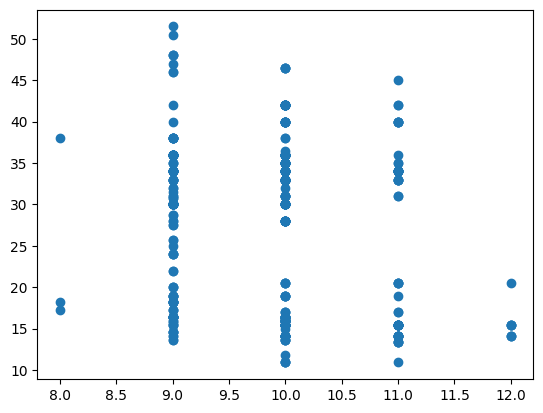

In [62]:
import matplotlib.pyplot as plt
plt.scatter('Month','Price',data=new_pumpkins)

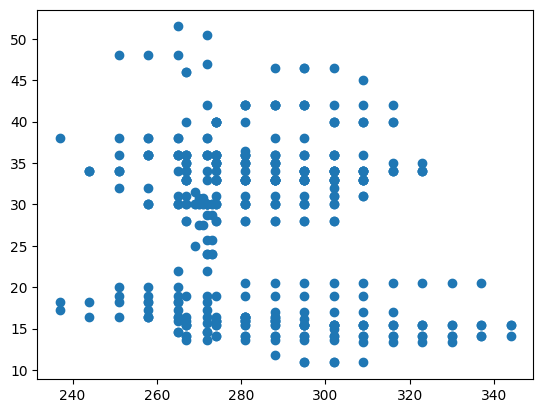

In [63]:
plt.scatter('DayOfYear','Price',data=new_pumpkins)

### Correlation

In [64]:
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))

-0.14878293554077535
-0.16673322492745407


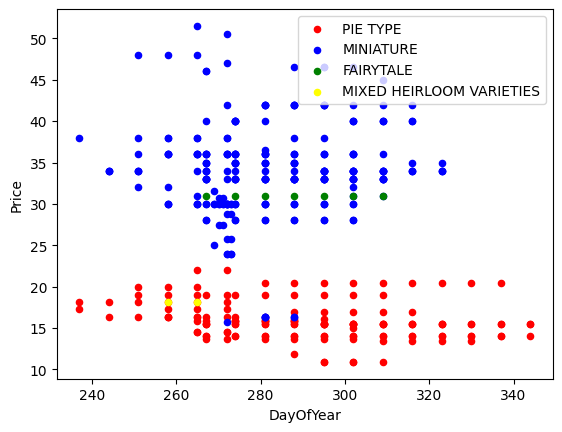

In [65]:
ax=None
colors=['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    df=new_pumpkins[new_pumpkins['Variety']==var]
    ax=df.plot.scatter('DayOfYear','Price',ax=ax,color=colors[i],label=var)

Text(0, 0.5, 'Pumpkin Price')

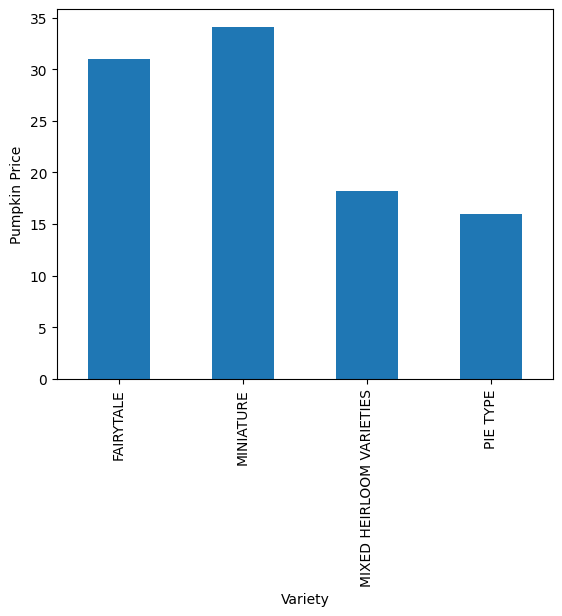

In [66]:
new_pumpkins.groupby(['Variety'])['Price'].mean().plot(kind='bar')
plt.ylabel('Pumpkin Price')

<Axes: xlabel='DayOfYear', ylabel='Price'>

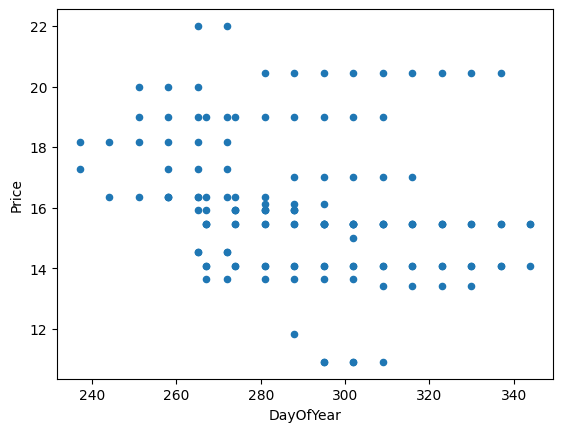

In [67]:
pie_pumpkin=new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
pie_pumpkin.plot.scatter('DayOfYear','Price')

In [68]:
pie_pumpkin.dropna(inplace=True)
pie_pumpkin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 70 to 1630
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    int32  
 1   DayOfYear   144 non-null    int64  
 2   Variety     144 non-null    object 
 3   City        144 non-null    object 
 4   Package     144 non-null    object 
 5   Low Price   144 non-null    float64
 6   High Price  144 non-null    float64
 7   Price       144 non-null    float64
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 9.6+ KB


C:\Users\alifa\AppData\Local\Temp\ipykernel_24840\1312036284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkin.dropna(inplace=True)


## Linear Regression And Training Model

- Show variable relationships. Show the relationship between variables
- Make predictions. Make accurate predictions on where a new datapoint would fall in relationship to that line.

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [70]:
X=pie_pumpkin['DayOfYear'].to_numpy().reshape(-1,1)
y=pie_pumpkin['Price']

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [72]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [73]:
pred=lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 2.77 (17.2%)


In [74]:
score=lin_reg.score(X_train,y_train)
print('Model determination: ',score)

Model determination:  0.04460606335028361


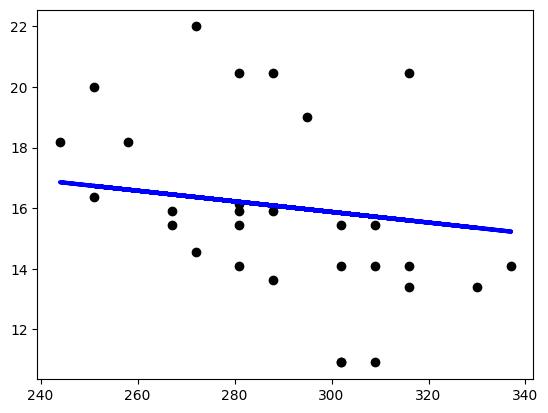

In [75]:
plt.scatter(X_test,y_test,color='black')
plt.plot(X_test,pred,color='blue',linewidth=3)

### Polynomial Regression

- creates a curved line to better fit nonlinear data

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline=make_pipeline(PolynomialFeatures(2),LinearRegression())
pipeline.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Mean error: 2.73 (17.0%)
Model determination:  0.07639977655280128


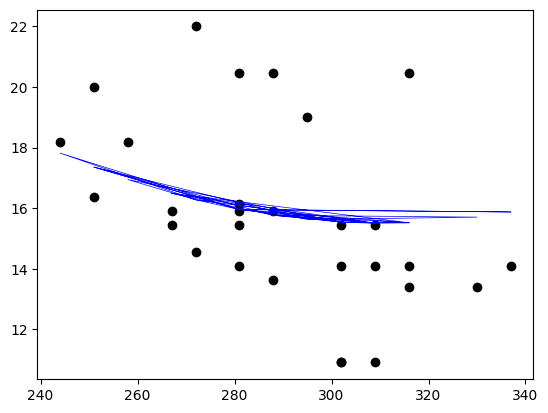

In [77]:
pred=pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score=pipeline.score(X_train,y_train)
print('Model determination: ',score)


plt.scatter(X_test,y_test,color='black')
plt.plot(X_test,pred,color='blue',linewidth=.5,linestyle='-')
plt.show()


### Categorical Variables

- Non Numeric Values

One Hot Encoding
- will replace the Variety column by 4 different columns, one for each variety. Each column will contain 1 if the corresponding row is of a given variety, and 0 otherwise. This means that there will be four coefficients in linear regression, one for each pumpkin variety, responsible for "starting price" (or rather "additional price") for that particular variety.

In [78]:
# set up training data
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# setup and train the pipeline
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train,y_train)

# predict results for test data
pred = pipeline.predict(X_test)

# calculate MSE and determination
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.46 (9.04%)
Model determination:  0.9574946889701916


## Logistic Regression
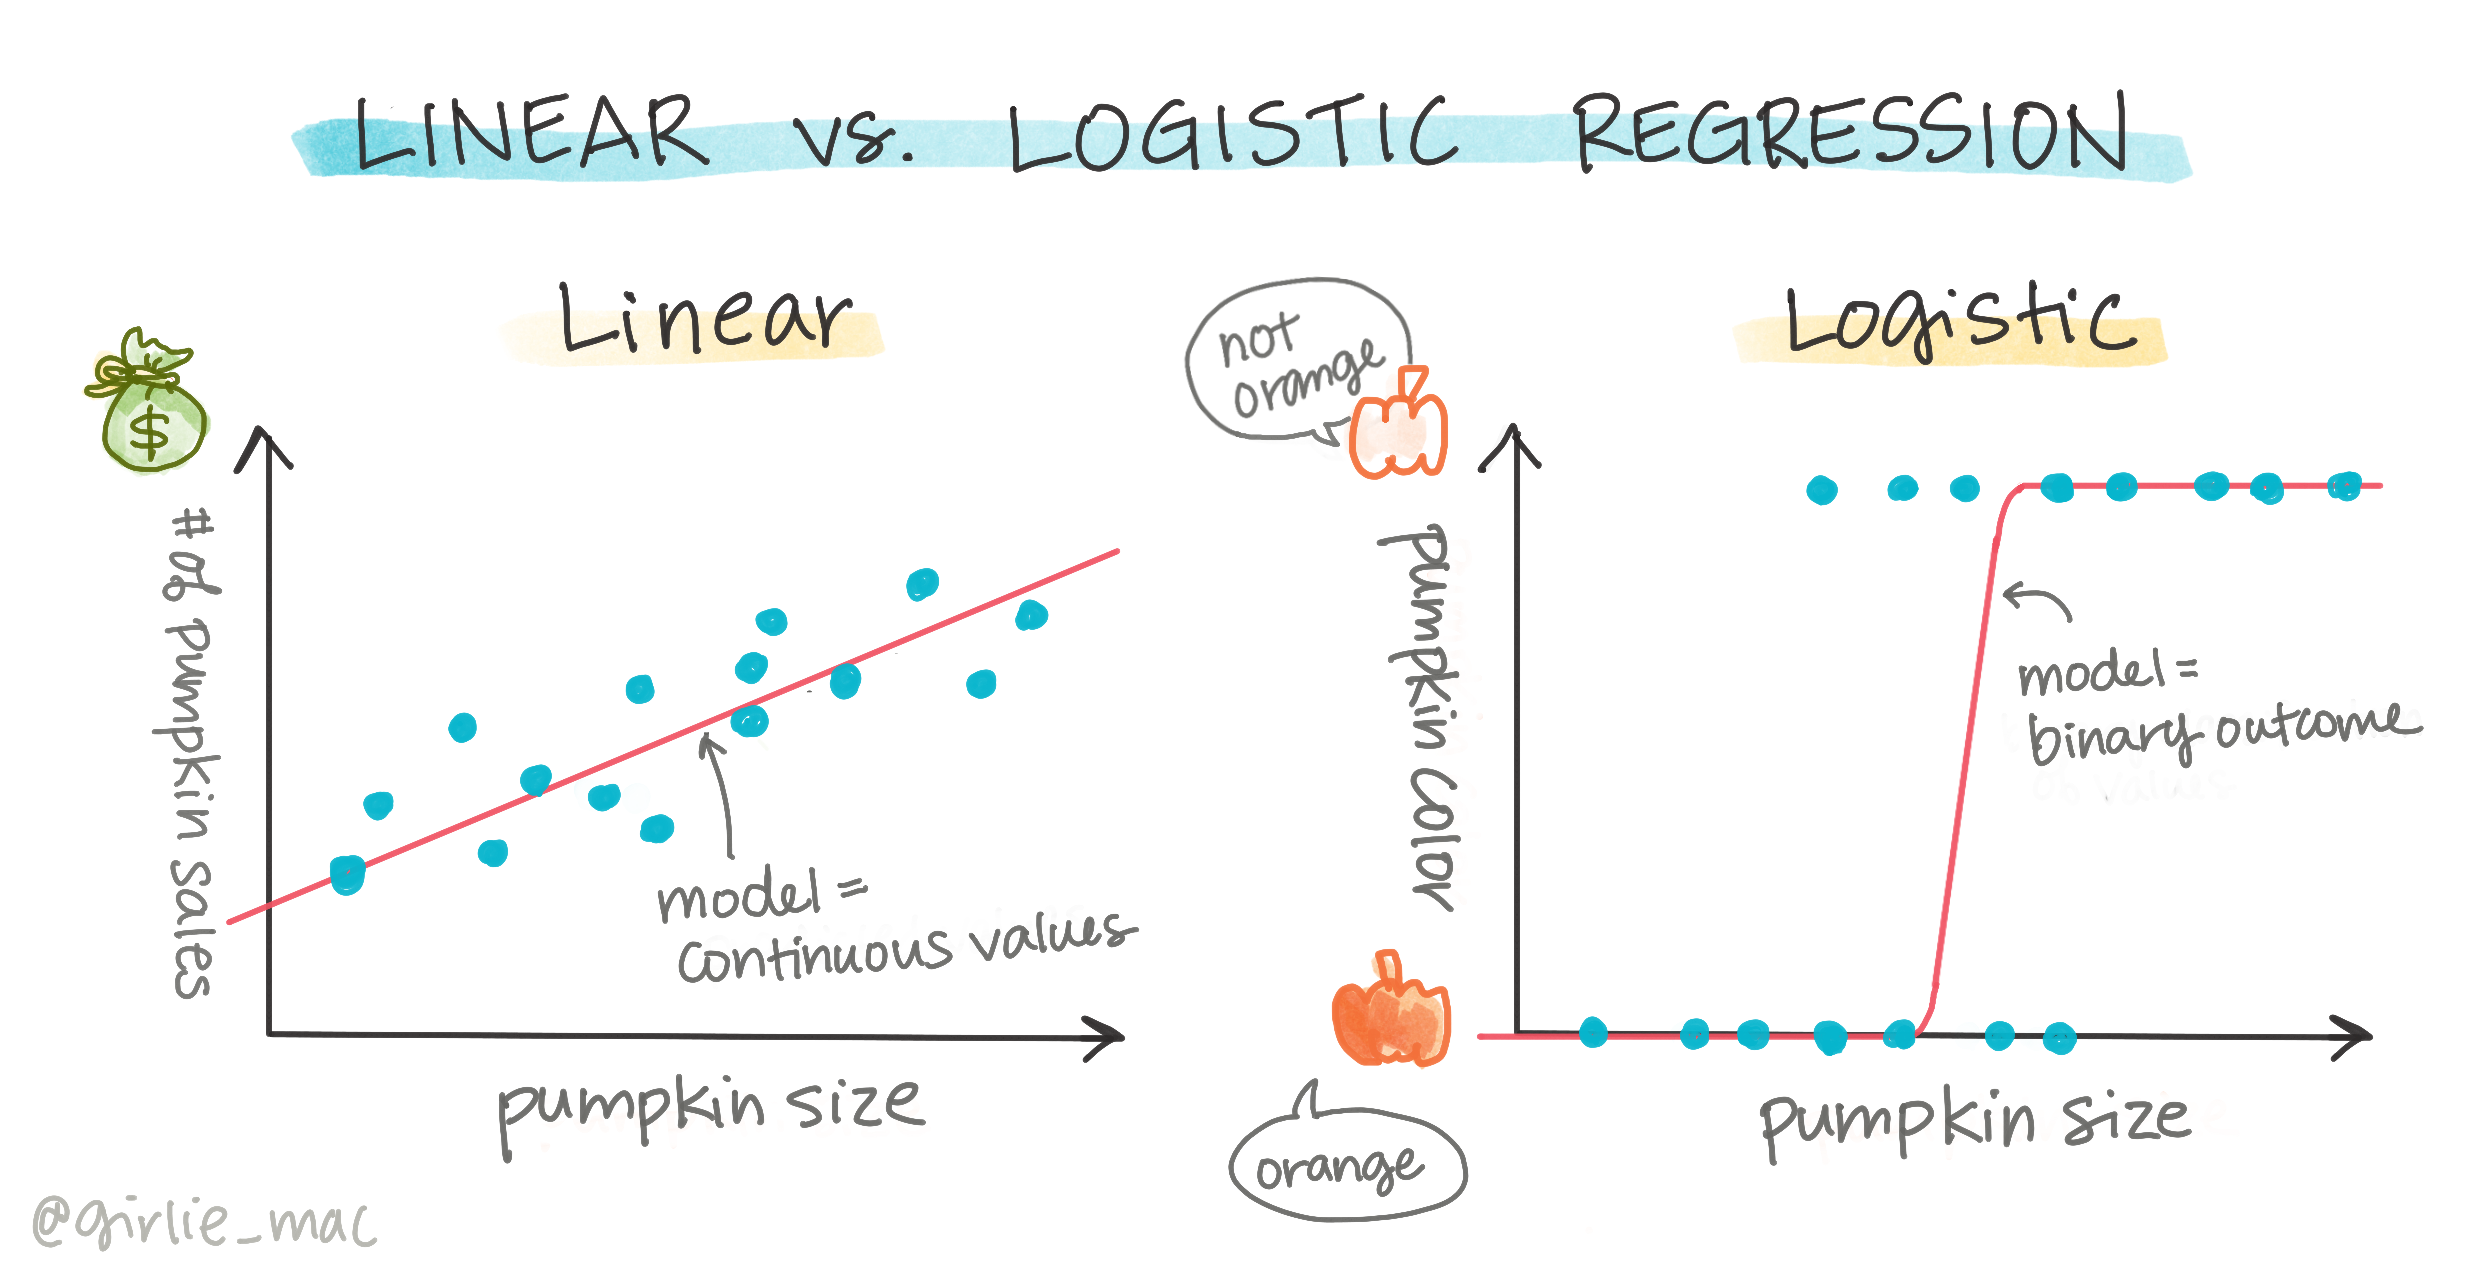

- Predict Binary categorical variables
- In this Notebook we can predict if the color of the pumpkin is orange or not
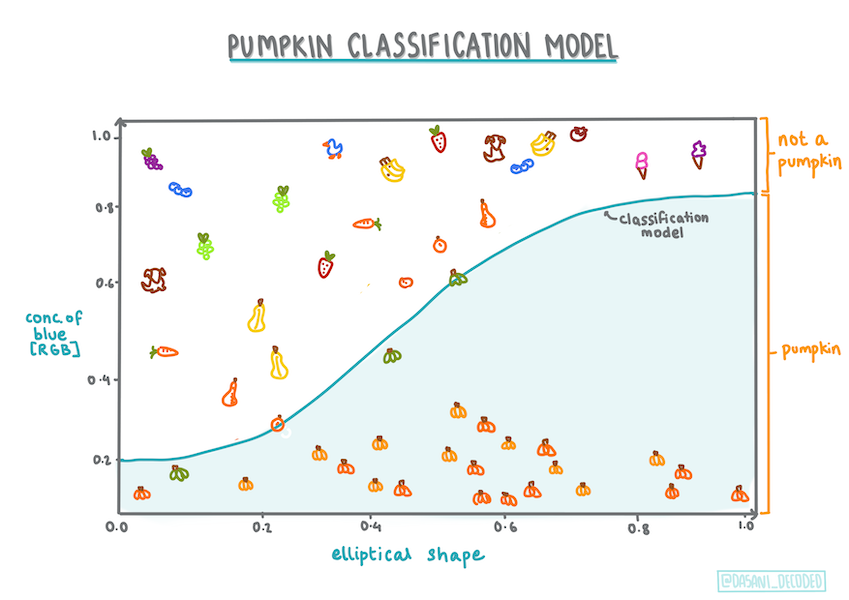

### **Other classifications**

There are other types of logistic regression, including multinomial and ordinal:

Multinomial, 
- which involves having more than one category - "Orange, White, and Striped".

Ordinal, 
- which involves ordered categories, useful if we wanted to order our outcomes logically, like our pumpkins that are ordered by a finite number of sizes (mini,sm,med,lg,xl,xxl).

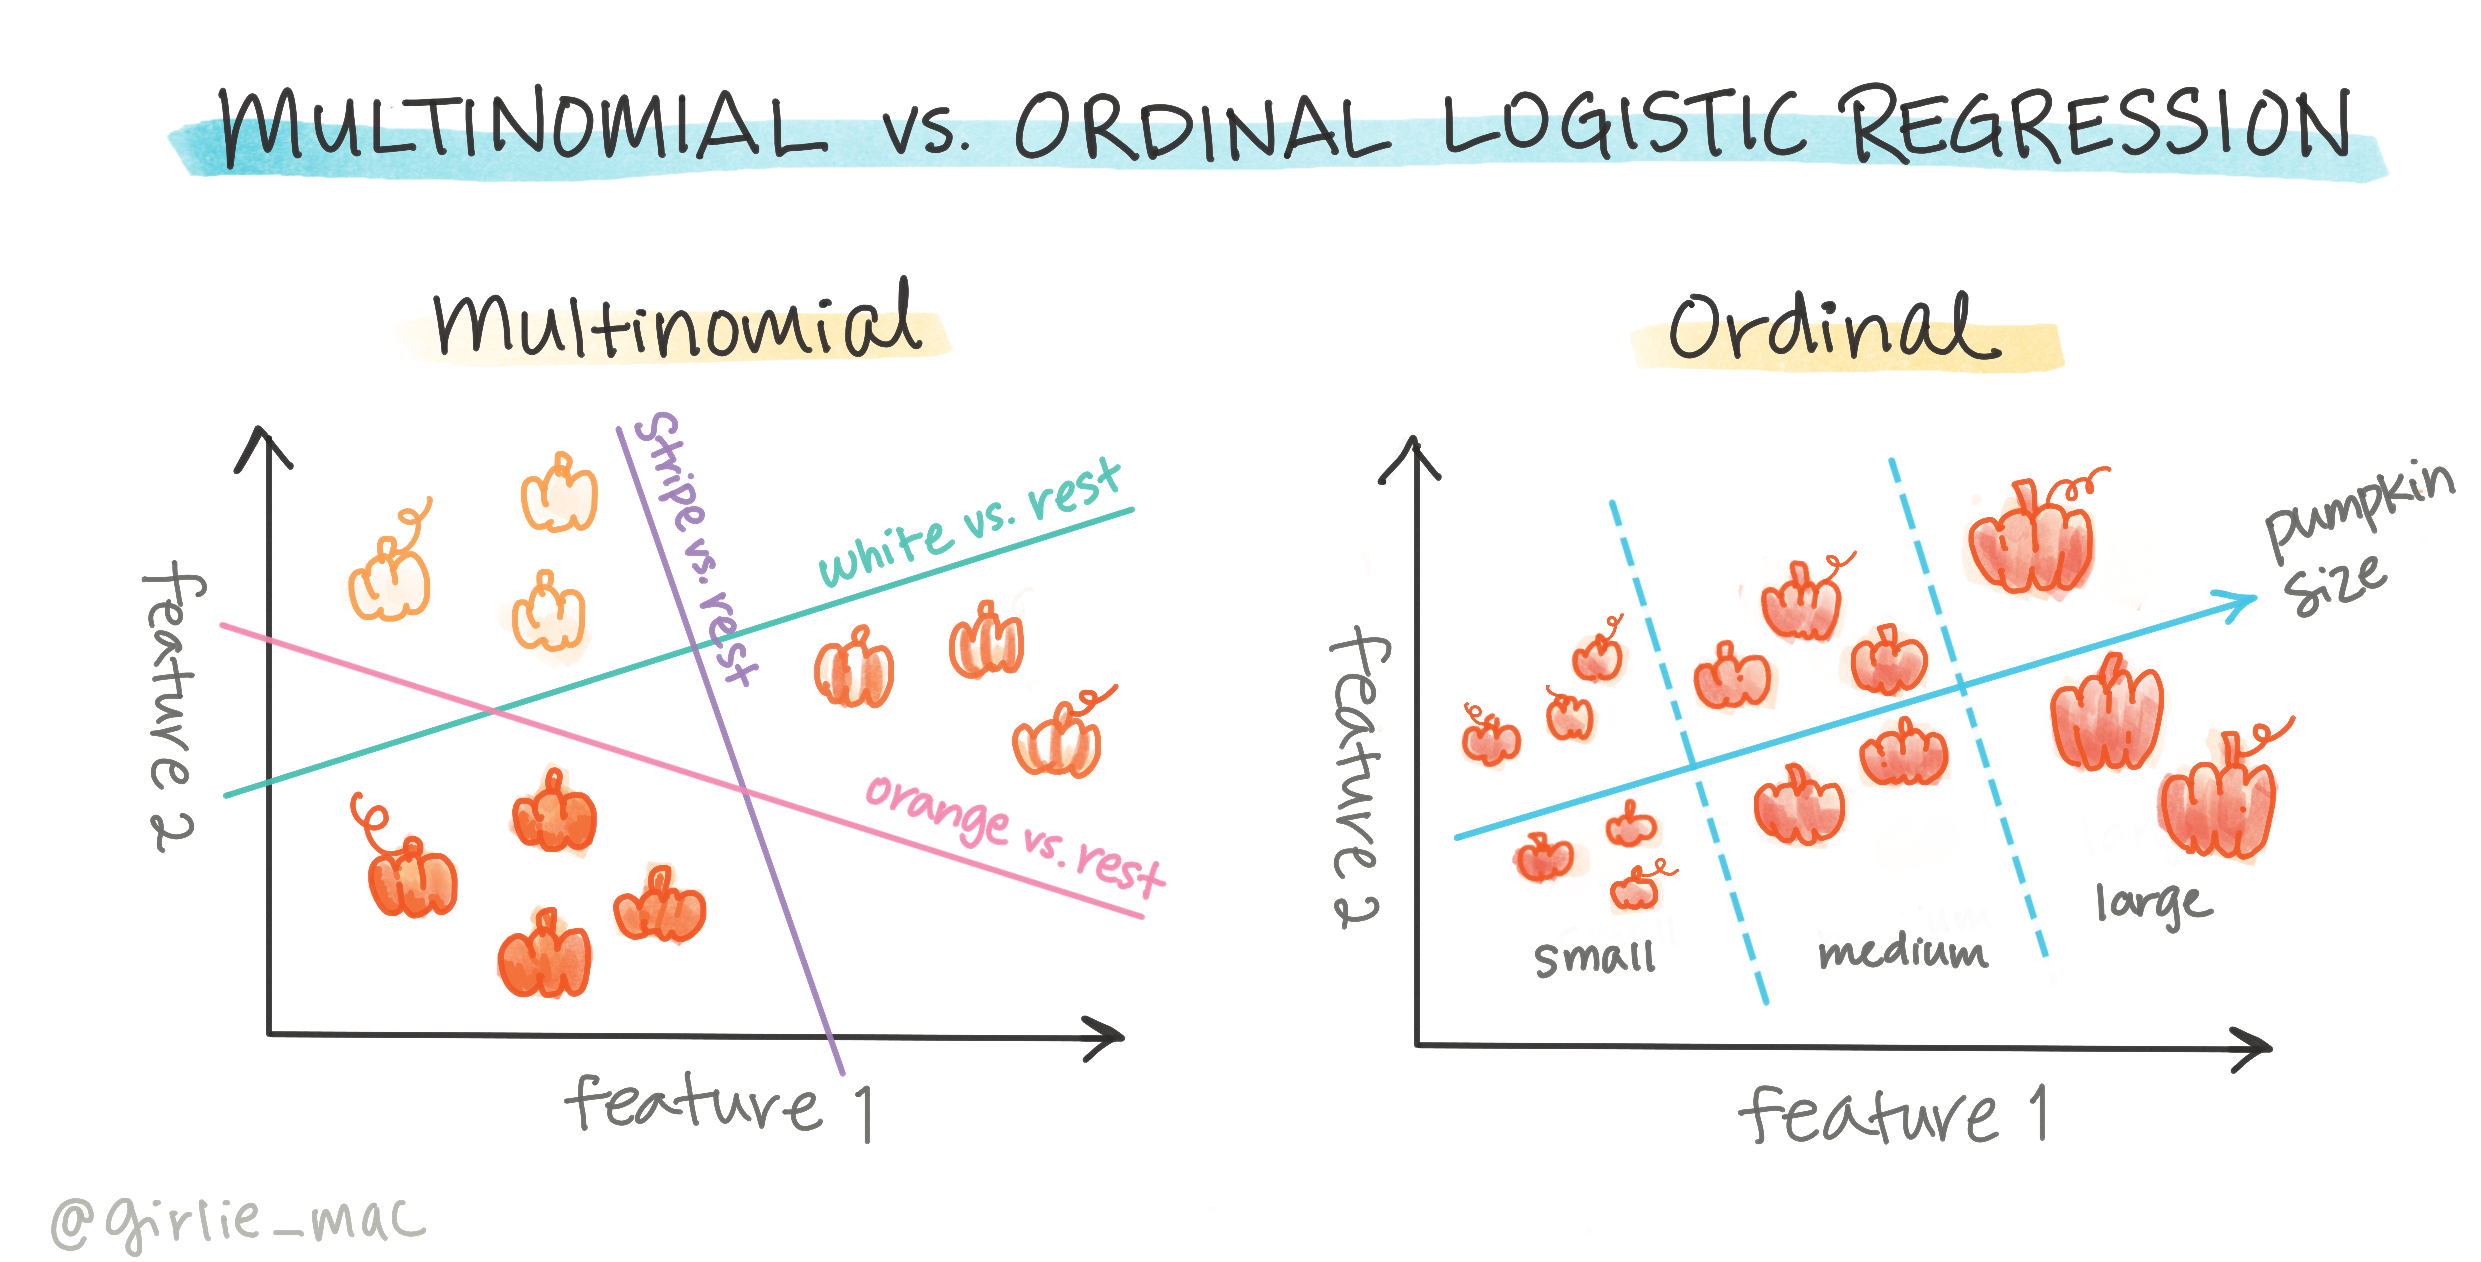

#### Exercise

In [79]:
import pandas as pd
full_pumpkins=pd.read_csv('US-pumpkins.csv')

columns_to_select = ['City Name','Package','Variety','Origin','Item Size','Color']
pumpkins=full_pumpkins.loc[:,columns_to_select]

pumpkins.dropna(inplace=True)

pumpkins

,City Name,Package,Variety,Origin,Item Size,Color
2,BALTIMORE,24 inch bins,HOWDEN TYPE,DELAWARE,med,ORANGE
3,BALTIMORE,24 inch bins,HOWDEN TYPE,VIRGINIA,med,ORANGE
4,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
5,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
6,BALTIMORE,36 inch bins,HOWDEN TYPE,MARYLAND,med,ORANGE
...,...,...,...,...,...,...
1694,ST. LOUIS,24 inch bins,HOWDEN WHITE TYPE,ILLINOIS,xlge,WHITE
1695,ST. LOUIS,24 inch bins,HOWDEN WHITE TYPE,ILLINOIS,xlge,WHITE
1696,ST. LOUIS,24 inch bins,HOWDEN WHITE TYPE,ILLINOIS,xlge,WHITE
1697,ST. LOUIS,24 inch bins,HOWDEN WHITE TYPE,ILLINOIS,xlge,WHITE


In [80]:
import seaborn as sns

pallete = {
    'ORANGE': 'orange',
    'WHITE': 'wheat',
}

sns.catplot(
    data=pumpkins,
    y='Variety',hue='Color',kind='count',
    palette=pallete,
)

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

item_size_categories = [['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']]
ordinal_features=['Item Size']

ordinal_encoder=OrdinalEncoder(categories=item_size_categories)
# ordinal_encoder
ordinal_features

['Item Size']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_features=['City Name','Package','Variety','Origin']
categorical_encoder=OneHotEncoder(sparse_output=False)

In [ ]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[
        ('ord', ordinal_encoder, ordinal_features),
        ('cat', categorical_encoder, categorical_features)
        ])

ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(pumpkins)

encoded_features



,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_MICHIGAN,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1695,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1696,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1697,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
encoded_label=label_encoder.fit_transform(pumpkins['Color'])

In [ ]:
encoded_pumpkins=encoded_features.assign(Color=encoded_label)
encoded_pumpkins

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA,Color
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1695,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1696,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1697,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


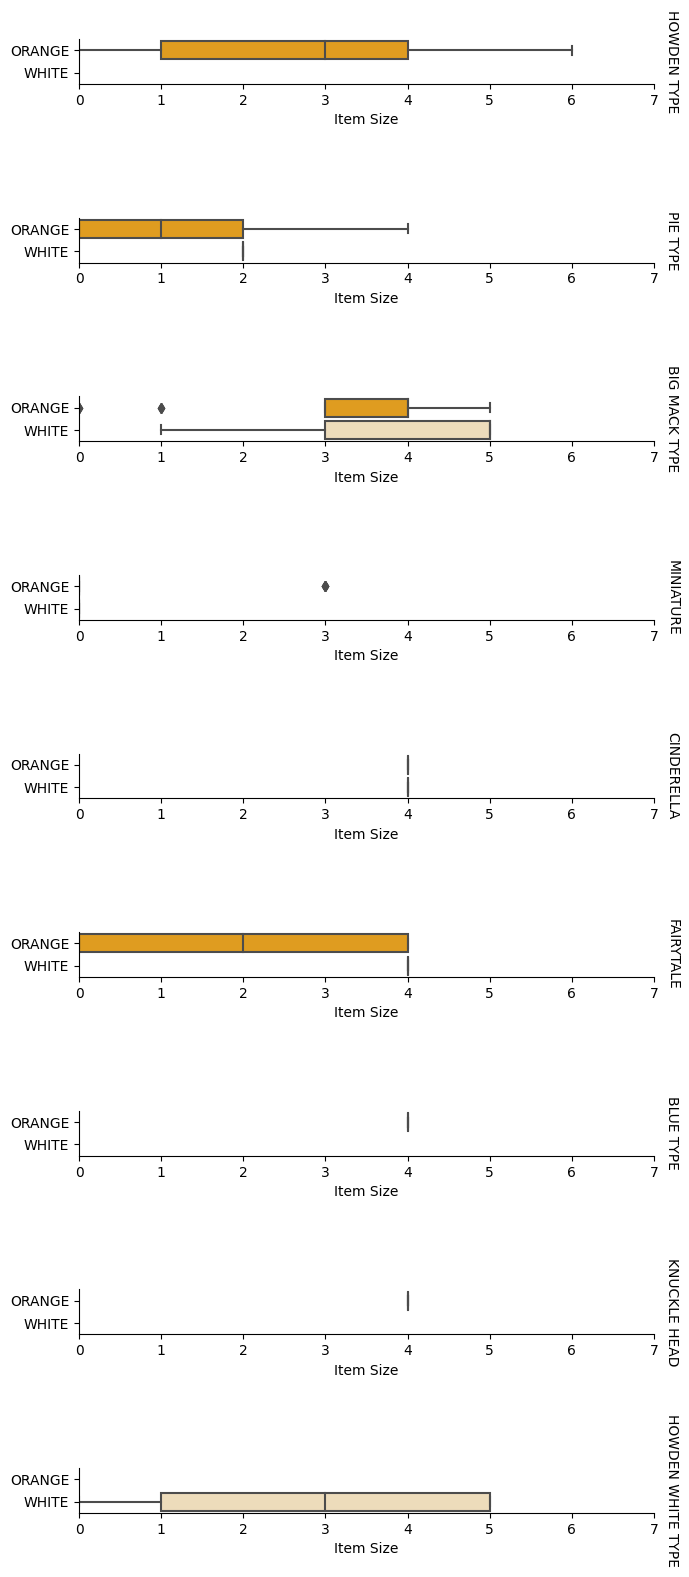

In [ ]:
pumpkins['Item Size']=encoded_pumpkins['ord__Item Size']

g=sns.catplot(
    data=pumpkins,
    x="Item Size",y="Color",row="Variety",
    kind="box",orient="h",sharex=False,
    margin_titles=True,
    height=1.8,aspect=4,palette=pallete,
)

g.set(xlabel='Item Size',ylabel="").set(xlim=(0,7))
g.set_titles(row_template='{row_name}')

#### Swarm Plot

C:\Users\alifa\AppData\Local\Temp\ipykernel_4616\1701659144.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x="Color",y="ord__Item Size",data=encoded_pumpkins,palette=pallete)
c:\Users\alifa\OneDrive\Documents\Work\.venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\alifa\OneDrive\Documents\Work\.venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Color', ylabel='ord__Item Size'>

c:\Users\alifa\OneDrive\Documents\Work\.venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\alifa\OneDrive\Documents\Work\.venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


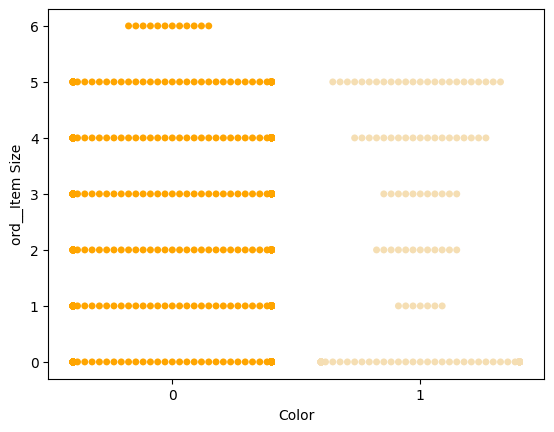

In [ ]:
pallete = {
    '0': 'orange',
    '1': 'wheat'
}

sns.swarmplot(x="Color",y="ord__Item Size",data=encoded_pumpkins,palette=pallete)